In [75]:
import numpy as np

from env import YoutubeEnv
import matplotlib.pyplot as plt

In [76]:
seed = 420
env = YoutubeEnv.random_env(seed=seed)

In [77]:
env

In [78]:
u = env.users[0]
c = env.channels[0]
for v in c.videos:
    print("v = ", v)
    print(u.watch(v))

v =  <videos.Video object at 0x161aca28d0>
sim :  0.6672768777755469
0.6834697929839558
v =  <videos.Video object at 0x161aca2908>
sim :  0.6672768777755469
0.6767581396281469
v =  <videos.Video object at 0x161aca2ba8>
sim :  0.5778787275115875
0.5155645772284325


In [79]:
actionsList = list(env.videos.values())

In [80]:
actionsList.index

<function list.index>

In [81]:
import random

random.sample(actionsList, 1)

In [82]:
q_table = np.zeros(len(actionsList))

In [92]:
import random

def Qlearning(actions, user, time_horizon = 500):
    
    q_table = np.zeros(len(actions))

    # Hyperparameters
    alpha = 0.7
    gamma = 0.3
    epsilon = 0.5

    # For plotting metrics
    all_epochs = []
    all_penalties = []

    action_seq = []
    reward_seq = []

    for i in range(0, time_horizon):
        #state = env.reset()

        epochs, penalties, reward, = 0, 0, 0
        
        if random.uniform(0, 1) < epsilon:
            action = random.sample([i for i in range(0, len(actions))], 1)[0] # Explore action space
        else:
            action = np.argmax(q_table) # Exploit learned values
        print(action)
        reward = u.watch(actions[action]) 
        
        old_value = q_table[action]
        next_max = np.max(q_table)
        
        new_value =  (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[action] = new_value
        
        action_seq.append(action)
        reward_seq.append(reward)

        if reward == 0:
            penalties += 1

        epochs += 1

    print("Training finished.\n")

    return action_seq, reward_seq



In [84]:
Qlearning(actionsList, u, time_horizon = 300)

0
sim :  0.6672768777755469
6
sim :  0.3447488929984103
7
sim :  0.3447488929984103
6
sim :  0.3447488929984103
22
sim :  0.3950144952360626
6
sim :  0.3447488929984103
11
sim :  0.3447488929984103
6
sim :  0.3447488929984103
12
sim :  1e-07
28
sim :  1e-07
29
sim :  1e-07
6
sim :  0.3447488929984103
6
sim :  0.3447488929984103
14
sim :  1e-07
11
sim :  0.3447488929984103
6
sim :  0.3447488929984103
25
sim :  0.3447488929984103
15
sim :  0.33235106912014456
6
sim :  0.3447488929984103
6
sim :  0.3447488929984103
6
sim :  0.3447488929984103
6
sim :  0.3447488929984103
10
sim :  0.5778787275115875
6
sim :  0.3447488929984103
6
sim :  0.3447488929984103
6
sim :  0.3447488929984103
6
sim :  0.3447488929984103
6
sim :  0.3447488929984103
26
sim :  0.42222943861773055
6
sim :  0.3447488929984103
25
sim :  0.3447488929984103
6
sim :  0.3447488929984103
6
sim :  0.3447488929984103
5
sim :  0.5671418970813641
6
sim :  0.3447488929984103
9
sim :  0.3447488929984103
3
sim :  0.6548790538972811
6


([0,
  6,
  7,
  6,
  22,
  6,
  11,
  6,
  12,
  28,
  29,
  6,
  6,
  14,
  11,
  6,
  25,
  15,
  6,
  6,
  6,
  6,
  10,
  6,
  6,
  6,
  6,
  6,
  26,
  6,
  25,
  6,
  6,
  5,
  6,
  9,
  3,
  6,
  8,
  6,
  16,
  6,
  6,
  7,
  6,
  6,
  8,
  6,
  6,
  6,
  28,
  6,
  6,
  3,
  6,
  0,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  5,
  25,
  29,
  5,
  6,
  1,
  6,
  6,
  19,
  6,
  9,
  6,
  22,
  27,
  6,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  11,
  5,
  11,
  5,
  5,
  27,
  5,
  5,
  5,
  9,
  5,
  5,
  5,
  10,
  5,
  8,
  5,
  5,
  5,
  9,
  5,
  5,
  5,
  0,
  5,
  5,
  5,
  20,
  14,
  5,
  14,
  5,
  2,
  5,
  9,
  5,
  5,
  5,
  4,
  9,
  5,
  29,
  5,
  5,
  2,
  5,
  5,
  16,
  5,
  12,
  0,
  26,
  21,
  5,
  29,
  4,
  5,
  5,
  5,
  19,
  5,
  5,
  21,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  2,
  5,
  5,
  5,
  7,
  25,
  10,
  5,
  17,
  5,
  23,
  5,
  5,
  5,
  5,
  5,
  5,
  7,
  5,
  5,
  24,
  5,
  22,
  5,
  5,
  5,
  5,
  5,
  26,
  5,
  5,

In [85]:
def get_best_action(user, model_param):
    best_action, best_reward = (0, 0)
    for i in range(len(model_param)):
        rew = user.watch(model_param[i])
        if rew > best_reward:
            best_action = i
            best_reward = rew
    return best_action, best_reward

In [86]:
def get_regret(action_seq, reward_seq, best_actions, best_reward):
    time_horizon = len(action_seq)
    regret = np.zeros(time_horizon, float)
    precision = np.zeros(time_horizon, float)
    for t in range(time_horizon):
        regret[t] = best_reward - reward_seq[t]
    return np.cumsum(regret), precision

In [87]:
def show_metrics(metrics, time_horizon):
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12, 4))
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Regret')
    ax1.plot(range(time_horizon),metrics[0], color = 'b')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Precision')
    ax2.set_ylim(-0.02,1.02)
    ax2.plot(range(time_horizon),metrics[1], color = 'b')
    plt.show()

28
sim :  1e-07
19
sim :  0.287824468832963
19
sim :  0.287824468832963
9
sim :  0.3447488929984103
2
sim :  0.5778787275115875
6
sim :  0.3447488929984103
2
sim :  0.5778787275115875
2
sim :  0.5778787275115875
29
sim :  1e-07
8
sim :  0.29856129926318653
2
sim :  0.5778787275115875
2
sim :  0.5778787275115875
6
sim :  0.3447488929984103
2
sim :  0.5778787275115875
9
sim :  0.3447488929984103
21
sim :  0.3225279847771366
2
sim :  0.5778787275115875
2
sim :  0.5778787275115875
16
sim :  0.33235106912014456
8
sim :  0.29856129926318653
2
sim :  0.5778787275115875
2
sim :  0.5778787275115875
2
sim :  0.5778787275115875
2
sim :  0.5778787275115875
7
sim :  0.3447488929984103
7
sim :  0.3447488929984103
29
sim :  1e-07
2
sim :  0.5778787275115875
12
sim :  1e-07
2
sim :  0.5778787275115875
18
sim :  0.33235106912014456
27
sim :  1e-07
15
sim :  0.33235106912014456
2
sim :  0.5778787275115875
2
sim :  0.5778787275115875
2
sim :  0.5778787275115875
4
sim :  0.8657031963445505
1
sim :  0.6672

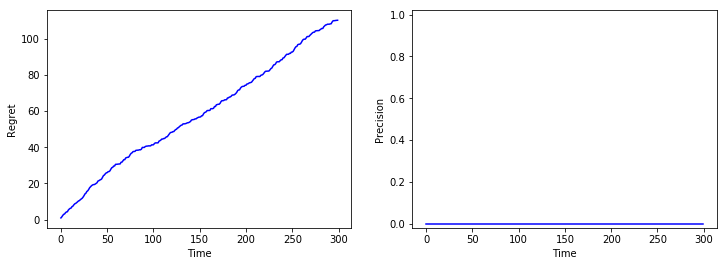

In [95]:
results = Qlearning(actionsList, u, time_horizon = 300)
regret = get_regret(*results, *get_best_action(u, actionsList))
show_metrics(regret, 300)

In [74]:
get_best_action(u, actionsList)

sim :  0.32874180099820716
sim :  0.5630651601199522
sim :  0.40262483478458866
sim :  1e-07
sim :  0.28469875095029595
sim :  1e-07
sim :  0.3492062684686189
sim :  0.3492062684686189
sim :  0.3492062684686189
sim :  0.32874180099820716
sim :  0.32874180099820716
sim :  0.5630651601199522
sim :  0.3492062684686189
sim :  0.5871202506048888
sim :  0.4276885863647354
sim :  1e-07
sim :  0.2704940124340395
sim :  1e-07
sim :  0.3492062684686189
sim :  0.3492062684686189
sim :  0.3492062684686189
sim :  0.32874180099820716
sim :  0.32874180099820716
sim :  0.32874180099820716
sim :  0.3492062684686189
sim :  0.30242149965459286
sim :  0.3492062684686189
sim :  0.3492062684686189
sim :  0.30242149965459286
sim :  0.3492062684686189


(13, 0.7166933880810423)